<a href="https://colab.research.google.com/github/VKarpick/powerplay/blob/main/danger_zone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install hockey-rink

  Created wheel for hockey-rink: filename=hockey_rink-0.1.7-py3-none-any.whl size=34876 sha256=ba2ec044e787d7c1cff756e413298eb642f7a7e682eff4890ff19fdacb009a23
  Stored in directory: /root/.cache/pip/wheels/9b/9c/06/217d4c3a942284788e7fce440ef4e47a8d032cdceb372ff7ec
Successfully built hockey-rink


In [ ]:
from hockey_rink import BDCRink
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
womens_pbp = pd.read_csv("https://raw.githubusercontent.com/bigdatacup/Big-Data-Cup-2021/main/hackathon_womens.csv")
nwhl_pbp = pd.read_csv("https://raw.githubusercontent.com/bigdatacup/Big-Data-Cup-2021/main/hackathon_nwhl.csv")

pbp = pd.concat([womens_pbp, nwhl_pbp])

# convert columns to snake case
pbp = pbp.rename(columns={c: c.replace(" ", "_").lower() for c in pbp.columns})

# only need goals between blue line and goal line
goals = pbp.loc[(pbp.event == "Goal") & (pbp.x_coordinate > 124) & (pbp.x_coordinate < 190)]

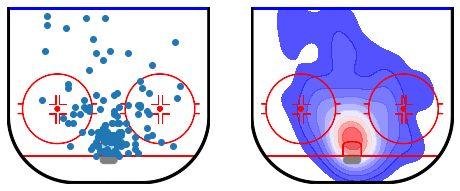

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(8, 4))
rink = BDCRink(rotation=270)

for ax in axs:
    rink.draw(display_range="ozone", ax=ax)

rink.scatter(goals.x_coordinate, goals.y_coordinate, ax=axs[0])

x, y = rink.convert_xy(goals.x_coordinate, goals.y_coordinate)
sns.kdeplot(x=x, y=y, cmap="bwr", shade=True, alpha=0.7, ax=axs[1], zorder=5);

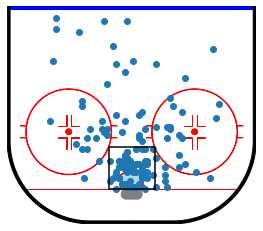

In [ ]:
rink = BDCRink(rotation=270)
rink.draw(display_range="ozone")
rink.scatter(goals.x_coordinate, goals.y_coordinate)
delta_x = 15
top_x = 189 - delta_x
delta_y = 8
left_y = 42.5 - delta_y
right_y = 42.5 + delta_y
rink.plot([189, top_x, top_x, 189, 189], [right_y, right_y, left_y, left_y, right_y], color="black", zorder=101);

In [ ]:
danger_zone_goals = goals.loc[(goals.x_coordinate >= top_x) & (goals.y_coordinate >= left_y) & (goals.y_coordinate <= right_y)]
len(danger_zone_goals) / len(goals)

0.5230769230769231